### Imports:

In [1]:
import pandas as pd  # Pandas is used for data manipulation and analysis, especially with tabular data.
import numpy as np  # NumPy provides support for large, multi-dimensional arrays and mathematical functions.
import xgboost as xgb  # Optimized gradient boosting library for supervised learning tasks.
from sklearn.model_selection import train_test_split, GridSearchCV  # Splits data into train/test sets and performs hyperparameter tuning.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve  # Evaluates model performance using various metrics.
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, animated, and interactive visualizations.
import seaborn as sns # Seaborn is a statistical data visualization library built on top of matplotlib.

About the Data:

1. DayOfWeek: 1 (Monday) - 7 (Sunday)  
2. Date: Scheduled date  
3. DepTime: Actual departure time (local, hhmm)  
4. ArrTime: Actual arrival time (local, hhmm)  
5. CRSArrTime: Scheduled arrival time (local, hhmm)  
6. UniqueCarrier: Unique carrier code  
7. Airline: Airline company  
8. FlightNum: Flight number  
9. TailNum: Plane tail number  
10. ActualElapsedTime: Actual time an airplane spends in the air (in minutes) with TaxiIn/Out  
11. CRSElapsedTime: CRS Elapsed Time of Flight (estimated elapse time), in minutes  
12. AirTime: Flight Time (in minutes)  
13. ArrDelay: Difference in minutes between scheduled and actual arrival time  
14. Origin: Origin IATA (International Air Transport Association) airport code  
15. Org_Airport: Origin Airport Name  
16. Dest: Destination IATA code  
17. Dest_Airport: Destination Airport Name  
18. Distance: Distance between airports (miles)  
19. TaxiIn: Wheels down and arrival at the destination airport gate, in minutes  
20. TaxiOut: The time elapsed between departure from the origin airport gate and wheels off, in minutes  
21. Cancelled: Was the flight canceled?  
22. CancellationCode: Reason for cancellation  
23. Diverted: 1 = yes, 0 = no  
24. CarrierDelay: Flight delay due to carrier (e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)  
25. WeatherDelay: Flight delay due to weather, 0 = No, yes = (in minutes)  
26. NASDelay: Flight delay by NSA (National Aviation System), 0 = No, yes = (in minutes)  
27. SecurityDelay: Flight delay by this reason, 0 = No, yes = (in minutes)  
28. LateAircraftDelay: Flight delay by this reason, 0 = No, yes = (in minutes)

In [2]:
data_path = '/content/sample_data/Flight_delay.csv'

In [3]:
df = pd.read_csv(data_path)
print(df.shape)
df.head(10)

(484551, 29)


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,...,2,5,0,N,0,12,0,0,0,25
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,...,5,5,0,N,0,7,0,0,0,12
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,...,6,6,0,N,0,40,0,0,0,7
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,...,6,7,0,N,0,5,0,0,0,59
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,...,6,11,0,N,0,3,0,0,0,69


# 1. Data Cleaning:

## 1-A. Exploring the DataFrame:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [5]:
df["Airline"].unique()

array(['Southwest Airlines Co.', 'Skywest Airlines Inc.',
       'United Air Lines Inc.', 'US Airways Inc.', 'Delta Air Lines Inc.',
       'Atlantic Southeast Airlines', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'American Eagle Airlines Inc.',
       'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways'], dtype=object)

## 1-B. Mising Data Inspection:

In [6]:
# Check for mising values:
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column:
missing_percentage = (missing_values / len(df)) * 100

# Display the missing data statistics:
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

Percentage of Missing Data:
 DayOfWeek            0.000000
Date                 0.000000
DepTime              0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        

In [7]:
# Since less than 1% of the Total Data of one of the Features is Missing and the DataSet is Large;
# we remove those rows with Missing Values:
data_cleaned = df.dropna()

# Verify that Missing Values have been removed:
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
DayOfWeek            0
Date                 0
DepTime              0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
Airline              0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Org_Airport          0
Dest                 0
Dest_Airport         0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


# 2. Data Exploration and Visualization:

In [8]:
data_cleaned.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000,481895.0,481895.0,481895.000000,481895.000000,481895.000000,481895.000000,481895.000000
mean,3.991116,1564.762019,1617.971840,1652.851901,2122.582467,135.165999,131.752118,109.218006,60.877770,57.463873,755.087330,6.785123,19.162870,0.0,0.0,17.334372,3.133625,13.600834,0.081574,26.727366
std,1.971202,452.299499,584.199712,466.221544,1802.895221,74.092529,71.562120,70.135500,56.948971,55.959767,571.707927,5.556250,15.329093,0.0,0.0,39.280481,19.452396,31.436459,1.880721,40.569804
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1340.000000,626.000000,80.000000,80.000000,57.000000,25.000000,23.000000,334.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1621.000000,1737.000000,1725.000000,1505.000000,117.000000,114.000000,90.000000,42.000000,40.000000,601.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3659.000000,168.000000,163.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000


In [9]:
df = data_cleaned

/tmp/ipython-input-10-222697202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayName'] = df['DayOfWeek'].map(day_map)


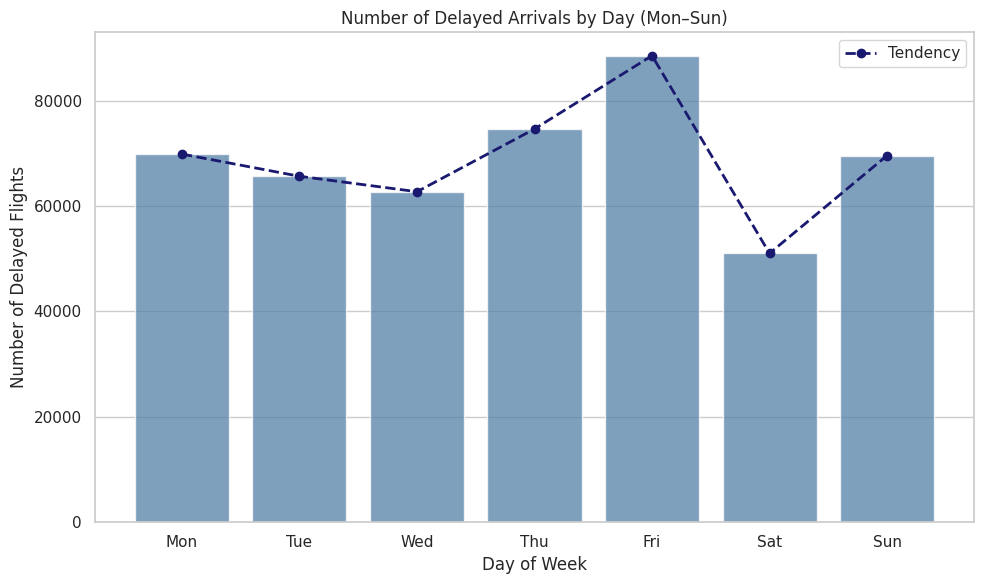

In [10]:
# Map DayOfWeek to readable names:
day_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
df['DayName'] = df['DayOfWeek'].map(day_map)

# Count delays per day (Mon–Sun):
week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
delay_counts = (
    df[df['DayName'].isin(week) & (df['ArrDelay'] > 0)]
    .groupby('DayName')
    .size()
    .reindex(week)
    .rename('DelayedFlights')
    .reset_index()
)

# Plot:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot with transparency:
sns.barplot(
    data=delay_counts,
    x='DayName',
    y='DelayedFlights',
    color='steelblue',
    alpha=0.75  # semi-transparent
)

# Trend line:
plt.plot(
    delay_counts['DayName'],
    delay_counts['DelayedFlights'],
    color='midnightblue',
    linewidth=2,
    marker='o',
    linestyle='--',
    label='Tendency'
)

# Titles and labels:
plt.title('Number of Delayed Arrivals by Day (Mon–Sun)')
plt.xlabel('Day of Week')
plt.ylabel('Number of Delayed Flights')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Preliminary Feature Engineering:

## 3-A. Select the Columns that we are going to use:

1. DayOfWeek: 1 (Monday) - 7 (Sunday)  
2. Date: Scheduled date  
3. DepTime: Actual departure time (local, hhmm)
4. Airline: Airline company
5. Origin: Origin IATA (International Air Transport Association) airport code
6. Dest: Destination IATA code
7. CarrierDelay: Flight delay due to carrier (e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)

In [11]:
df = df[['DayOfWeek','Date','DepTime','Airline','Origin','Dest','CarrierDelay']]
df.head(10)

,DayOfWeek,Date,DepTime,Airline,Origin,Dest,CarrierDelay
0,4,03-01-2019,1829,Southwest Airlines Co.,IND,BWI,2
1,4,03-01-2019,1937,Southwest Airlines Co.,IND,LAS,10
2,4,03-01-2019,1644,Southwest Airlines Co.,IND,MCO,8
3,4,03-01-2019,1452,Southwest Airlines Co.,IND,PHX,3
4,4,03-01-2019,1323,Southwest Airlines Co.,IND,TPA,0
5,4,03-01-2019,1416,Southwest Airlines Co.,ISP,BWI,12
6,4,03-01-2019,1657,Southwest Airlines Co.,ISP,BWI,7
7,4,03-01-2019,1422,Southwest Airlines Co.,ISP,FLL,40
8,4,03-01-2019,2107,Southwest Airlines Co.,ISP,MCO,5
9,4,03-01-2019,1812,Southwest Airlines Co.,ISP,MDW,3


## 3-B. Convert Date Column to Pandas Datetime:

In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# Drop the original 'Date' column since XGBoost does not handle datetime types:
df = df.drop(columns=['Date'])

/tmp/ipython-input-12-602284750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
/tmp/ipython-input-12-602284750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month
/tmp/ipython-input-12-602284750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

# 3-C. Identify Categorical variables:

In [13]:
# The XGBoost Library does not allow categorical data into the Model, so we encode these Features into dummy variables or "One-Hot Encoding":
categories = df.select_dtypes(include=['object']).columns
categories

Index(['Airline', 'Origin', 'Dest'], dtype='object')

# 3-D. One-Hot Encoding (Dummy Variables) for Categorical Data

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Preparing Data for Analysis:

## 4-A. Prepare Target Variable(s):

In [15]:
df_encoded['is_delayed_60+'] = np.where(df_encoded['CarrierDelay'] > 60, 1, 0)
# df_encoded['is_delayed_15+'] = np.where(df_encoded['CarrierDelay'] > 30, 1, 0)


# 4-B. Define features and target variable:


In [16]:
X = df_encoded.drop(columns=['is_delayed_60+', 'CarrierDelay'])
y = df_encoded['is_delayed_60+']

# 4-C. Split the data into training and testing sets:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. XGBoost Classifier (Baseline Model) Training and Evaluation:

## 5-A. Initialize and Fit the XGBoost classifier:

In [18]:
# Setting a random model seed to evaluate the model during training using logarithmic loss (also known as binary cross-entropy):
xgb_model = xgb.XGBClassifier(random_state=0,
                              eval_metric='logloss')

In [19]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## 5-B. Training the Model:

In [20]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## 5-C.  Prediction on the test Set:

In [21]:
y_pred = xgb_model.predict(X_test)

## 5-D. Evaluate the Model:

In [22]:
print("XGBoost Classifier (Baseline):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

XGBoost Classifier (Baseline):
Accuracy: 0.9257


In [23]:
# Confusion Matrix (a table that summarizes the performance of a classification model by comparing predicted vs. actual labels.):
cm = confusion_matrix(y_test, y_pred)
cm

array([[133737,     65],
       [ 10679,     88]])

In [24]:
# Predict probabilities for the test set (to calculate the Area Under the Curve; it measures the ability of a classifier to distinguish
# between classes. It is the area under the Receiver Operating Characteristic curve, which plots the True Positive Rate (TPR)
# against the False Positive Rate (FPR) at various threshold settings.):
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the A.U.C. score:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# (A higher value from 0.0 to 1.0 indicates a better model).

AUC Score: 0.7102


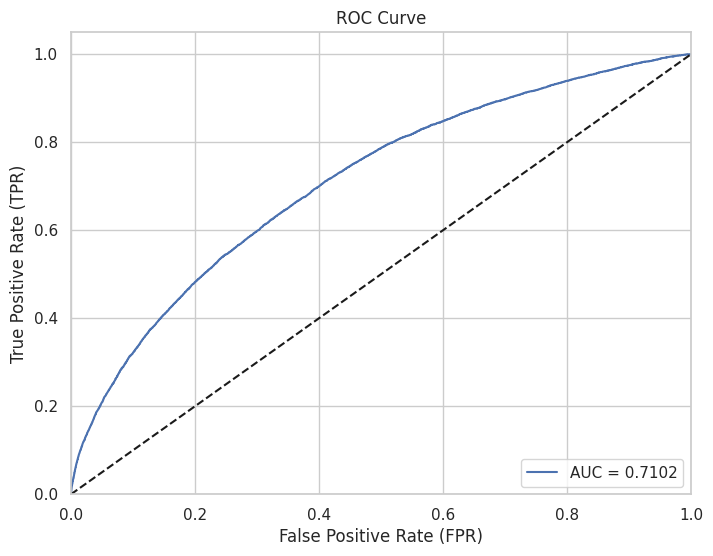

In [25]:
# Plot the R.O.C. curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 6. HyperParameter Tunning/Improving the Model:

The accuracy of our XGBoost Classifier Model was not so high (only 70.95%), we have to fine tune it and improve it.

## 6-A. Do Cross-Validated Grid Search:

In [28]:
# Define the parameter grid with alernative tune values:
param_grid = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'subsample': [0.6,  1.0]
}

# Initialize the XGBoost model:
xgb_model = xgb.XGBClassifier(random_state=0,
                              eval_metric='logloss')

# Set up GridSearchCV:
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search model:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 250], 'subsample': [0.6, 1.0]},
             scoring='roc_auc', verbose=1)

## 6-B. Evaluate best parameters and predict on training set:

In [29]:
# Best parameters from GridSearch:
print("Best parameters found: ", grid_search.best_params_)

# Predict with the best model:
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned XGBoost model
print("XGBoost Classifier (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 250, 'subsample': 1.0}
XGBoost Classifier (Tuned):
Accuracy: 0.9258


In [30]:
# Confusion matrix:
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[133706,     96],
       [ 10633,    134]])

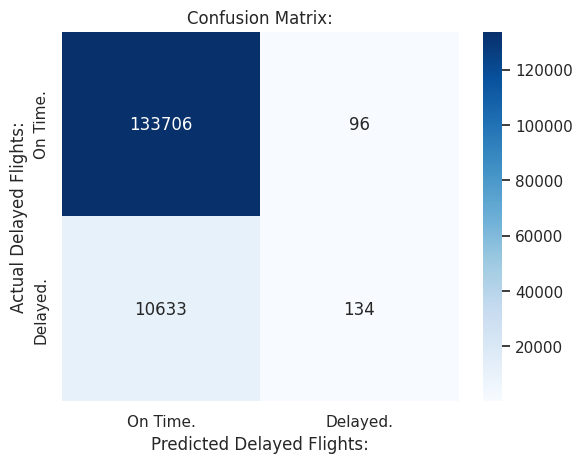

In [38]:
labels = ['On Time.', 'Delayed.']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Delayed Flights:')
plt.ylabel('Actual Delayed Flights:')
plt.title('Confusion Matrix:')
plt.show()

Out of all test flights, the model correctly predicted 134 delayed flights and 133,706 on-time flights.
However, it missed 10,633 delays, and mistakenly flagged 96 on-time flights as delays.

In [33]:
# Predict probabilities for the test set (to calculate A.U.C.):
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # We need probabilities for the positive class.

# Calculate the A.U.C. score:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Now we improved our A.U.C. score up to 71.68%.

AUC Score: 0.7186


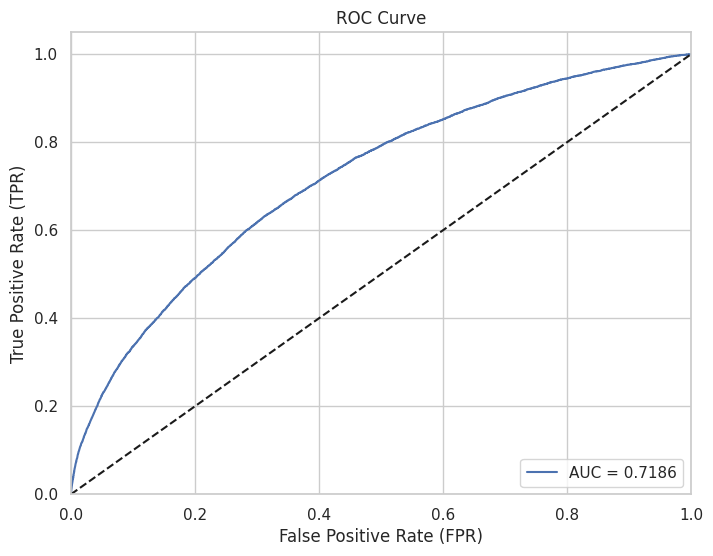

In [32]:
# Plot the R.O.C. curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# PROJECT IN PROGRESS🛠️(MORE FINE TUNNING TO COME!).